<h2><center>Landslide Prediction Challenge</h2></center>

A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties.


Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides

<img src = "https://drive.google.com/uc?export=view&id=1-8sSI75AG3HM89nDJEwo6_KJbAEUXS-r">

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.

***Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques***

This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.


Table of contents:

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Preview files](#Preview)
4. [Data dictionary](#Dictionary)
5. [Data exploration](#Exploration)
6. [Target distribution](#Target)
7. [Outliers](#Outliers)
8. [Correlations](#Correlations)
9. [Feature Engineering](#Engineering)
10. [Model training](#Model)
11. [Improve model performance](#Conclusion)
12. [Export test predictions](#Test)
13. [Export all predictions](#Full)

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import pickle
from os.path import exists
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<a name = "Load"></a>
## 2. Load files

In [25]:
# Read files to pandas dataframes
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

<a name = "Preview"></a>
## 3. Min-Max scaling and One-Hot encoding

In [26]:
# Check the first five rows of the train set
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [27]:
test.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,10865,111,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83452,36.055030,27.01712,22.98977,27.01712,43.49152,49.490830,42.67464,30.96376,22.98977,27.017120,39.509710,44.56372,43.49152,35.26439,12.604380,11.309930,17.54840,28.30320,38.87666,5.710593,5.710593,8.049467,12.60438,26.56505,240.9454,254.05460,281.30990,315.00000,348.69010,251.56500,250.01690,257.47120,270.00000,315.00000,281.30990,255.96380,246.03750,251.56500,278.130100,296.56510,270.00000,251.56500,248.19860,277.125000,360.00000,180.00000,135.00000,333.43490,306.86990,0.035766,-0.013152,-0.037572,-0.062401,-0.055791,0.027593,0.002834,-0.038738,-0.052596,-0.035428,0.031410,0.010285,-0.030370,-0.047145,-0.030835,0.060269,0.010774,-0.009391,-0.030129,-0.029237,0.088753,0.075792,0.023841,-0.001485,-0.010110,-0.016483,-0.044767,-0.042420,-0.053476,-0.043530,0.008279,0.002710,-0.010917,-0.013603,-0.011500,0.026537,0.017282,-0.005495,-0.016250,-0.016121,0.074879,0.055460,0.042507,0.019065,-0.003870,0.024342,0.042834,0.056148,0.040106,0.021167,9.667106,8.181493,7.782584,8.776177,10.954420,8.896092,11.257830,10.227420,10.278770,8.030625,5.094675,8.138618,10.002860,11.459460,9.746919,1.718303,1.830190,4.348740,5.784863,10.840700,0.664827,0.000081,0.000261,0.846584,4.815838,2.682646,4.814003,6.252043,6.667844,6.602260,2.240095,2.561107,3.066897,5.311826,6.215635,2.774525,2.446323,2.663095,3.096692,4.132727,2.930157,4.044015,3.533233,2.135064,4.028785,4.076646,8.517193,9.857834,5.307338,3.319677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.310570,1.310638,1.310684,1.310752,1.310797,1.310388,1.310456,1.310502,1.310570,1.310616,1.310266,1.310335,1.310381,1.310449,1.310495,1.310084,1.310153,1.310199,1.310267,

<a name = "Dictionary"></a>
## 4. Data Dictionary
<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [28]:
# Check shape and size of train and test set
train.shape, test.shape

((10864, 227), (5430, 226))

<a name = "Exploration"></a>
## 5. Data exploration

In [29]:
# Check statistical summaries of the train set
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

 - There is a very high correlation between features extracted from the same location

<Figure size 2000x1200 with 0 Axes>

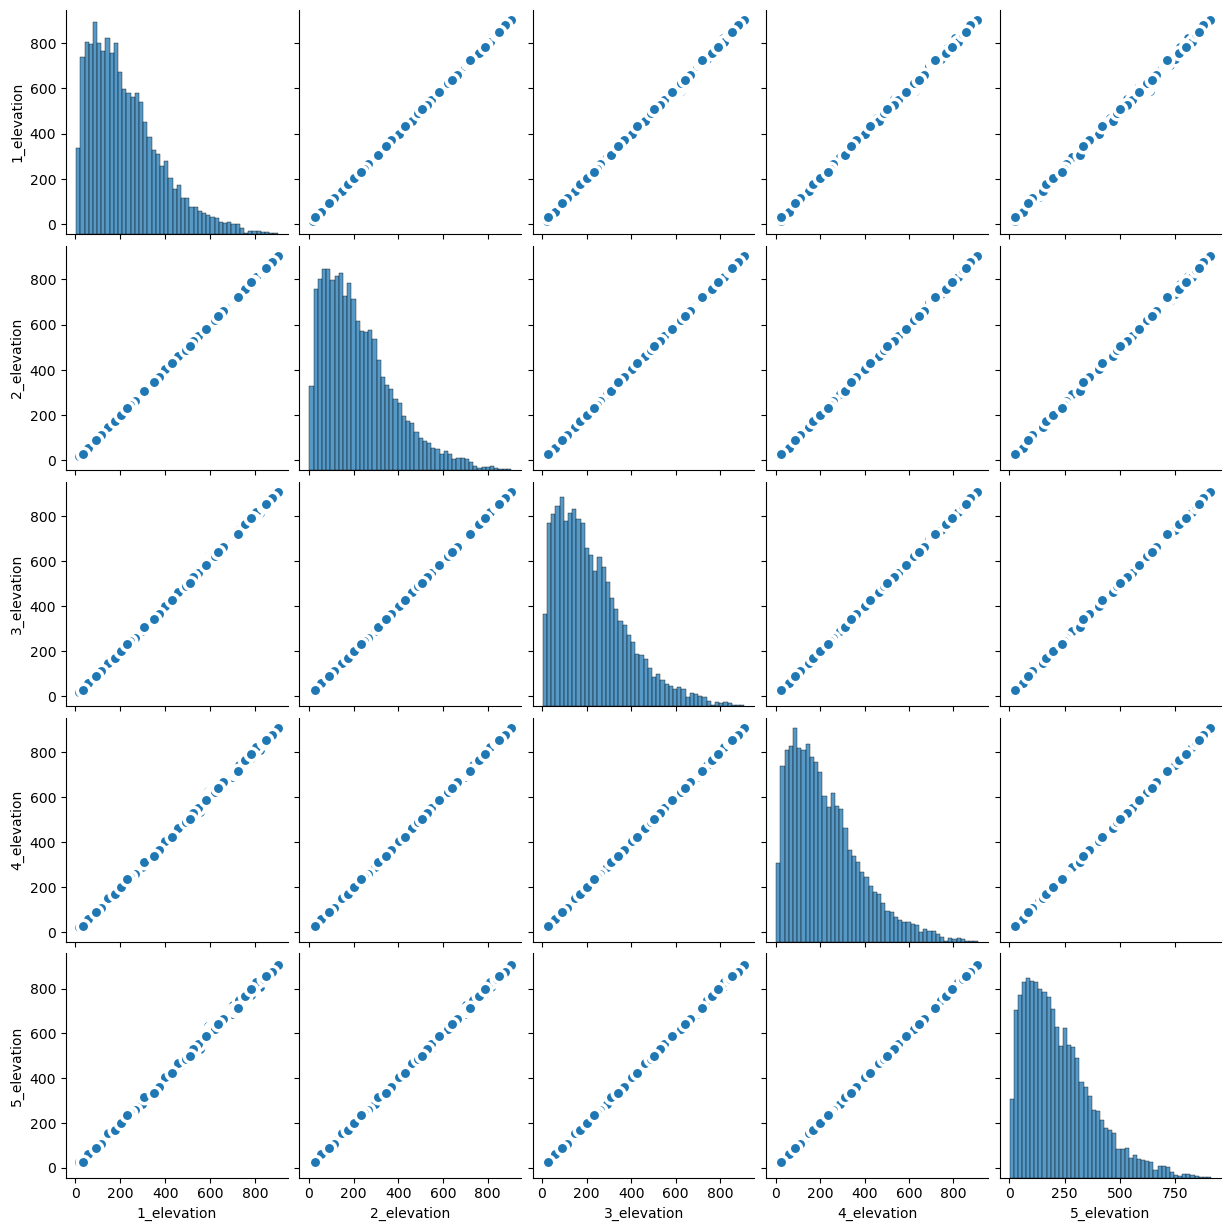

In [30]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation',	'2_elevation',	'3_elevation',	'4_elevation',	'5_elevation']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [31]:
# Check statistical summaries of the test set
test.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.0000

In [32]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [33]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

<a name = "Target"></a>
## 6. Target variable distribution

In [34]:
# Check distribution of the target variabe
train.Label.value_counts(normalize = True)

0    0.75
1    0.25
Name: Label, dtype: float64

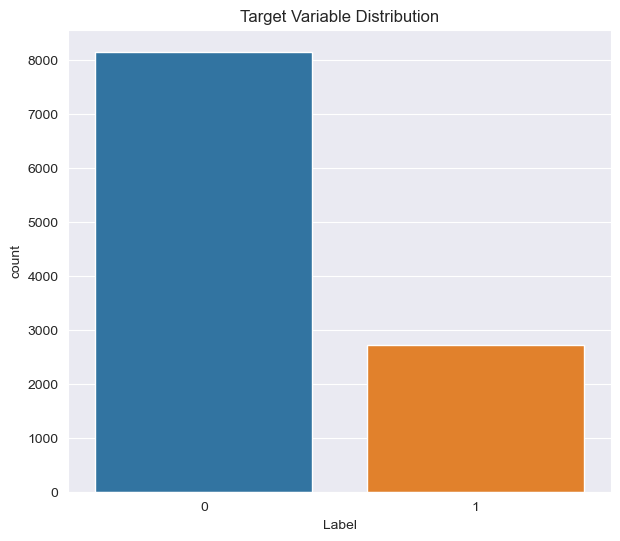

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= train.Label)
plt.title('Target Variable Distribution')
plt.show()

The dataset is highly imbalanced with the majority class having 75% and the minority class 25%

Some techiques in handling class imbalance include;
 1. Using SMOTE to create synthetic data to reduce imbalanceness
 2. Undersampling the majority class
 3. Oversampling the minority class
 4. Giving more weight to minority class during modelling

<a name = "Outliers"></a>
## 7. Outliers

In [36]:
# Exploring some features for cell 1
explore_cols =  ['1_elevation', '1_aspect', '1_slope', '1_placurv', '1_procurv', '1_lsfactor']
explore_cols

['1_elevation', '1_aspect', '1_slope', '1_placurv', '1_procurv', '1_lsfactor']

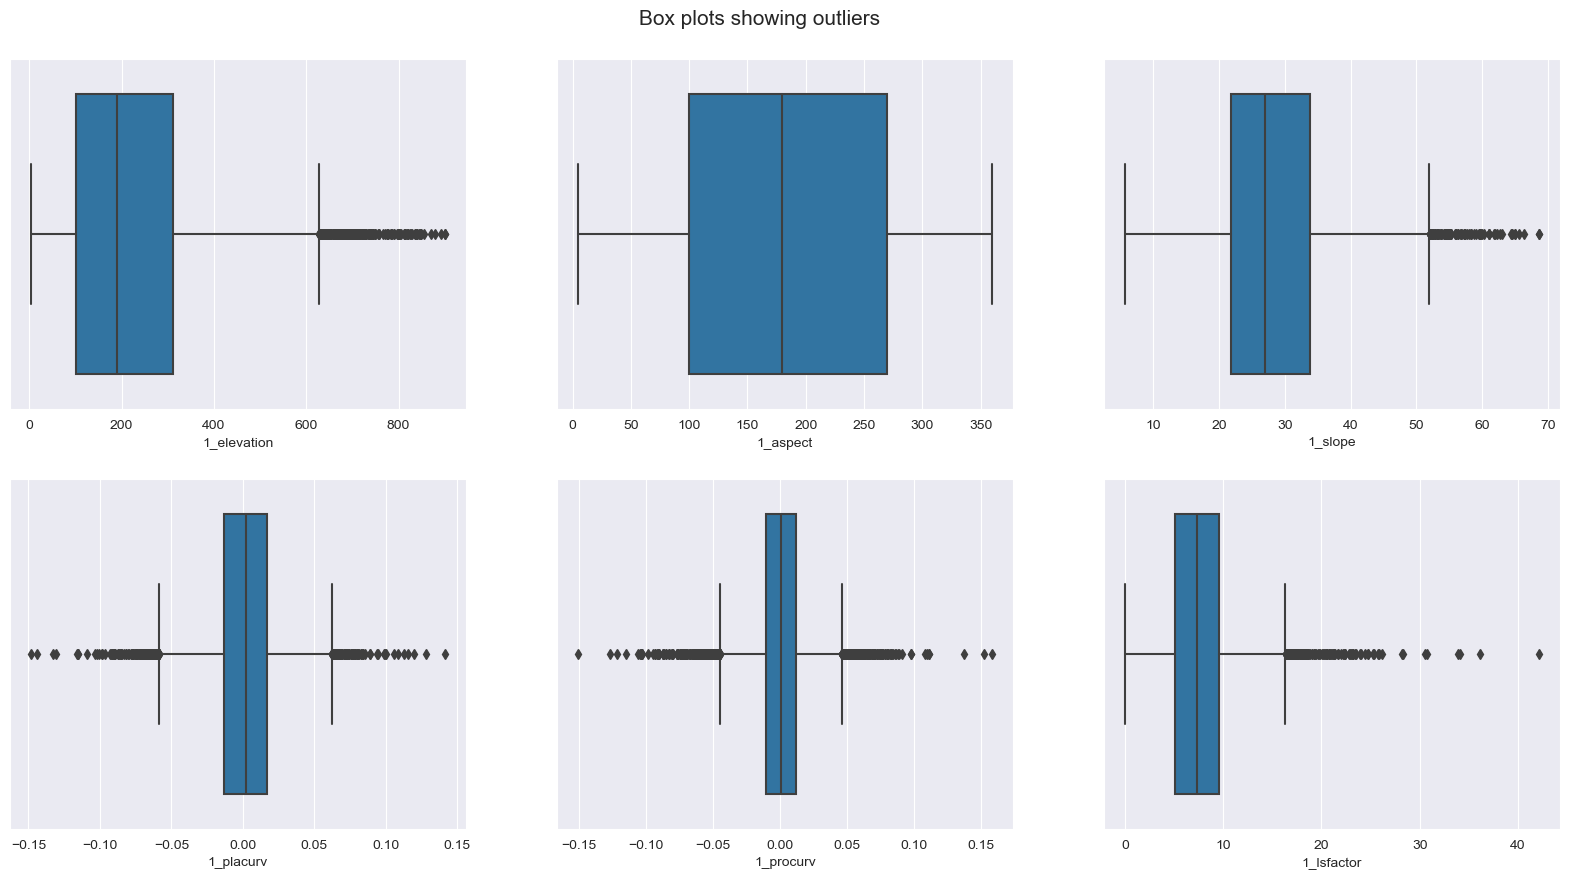

In [37]:
# Plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, explore_cols):
  sns.boxplot(train[name], ax = ax)

 Elevation, IsFactor, Placurv, curve and slope have some outliers.
 The aspect feature has no outliers.
 
 Some of the techniques you can use to handle outliers include:
  1. Log transformations, scaling, box-cox transformations...
  2. Dropping the outliers
  3. Replacing the outliers with mean, median, mode or any other aggregates

<a name = "Correlations"></a>
## 8. Correlations

<Figure size 2000x1200 with 0 Axes>

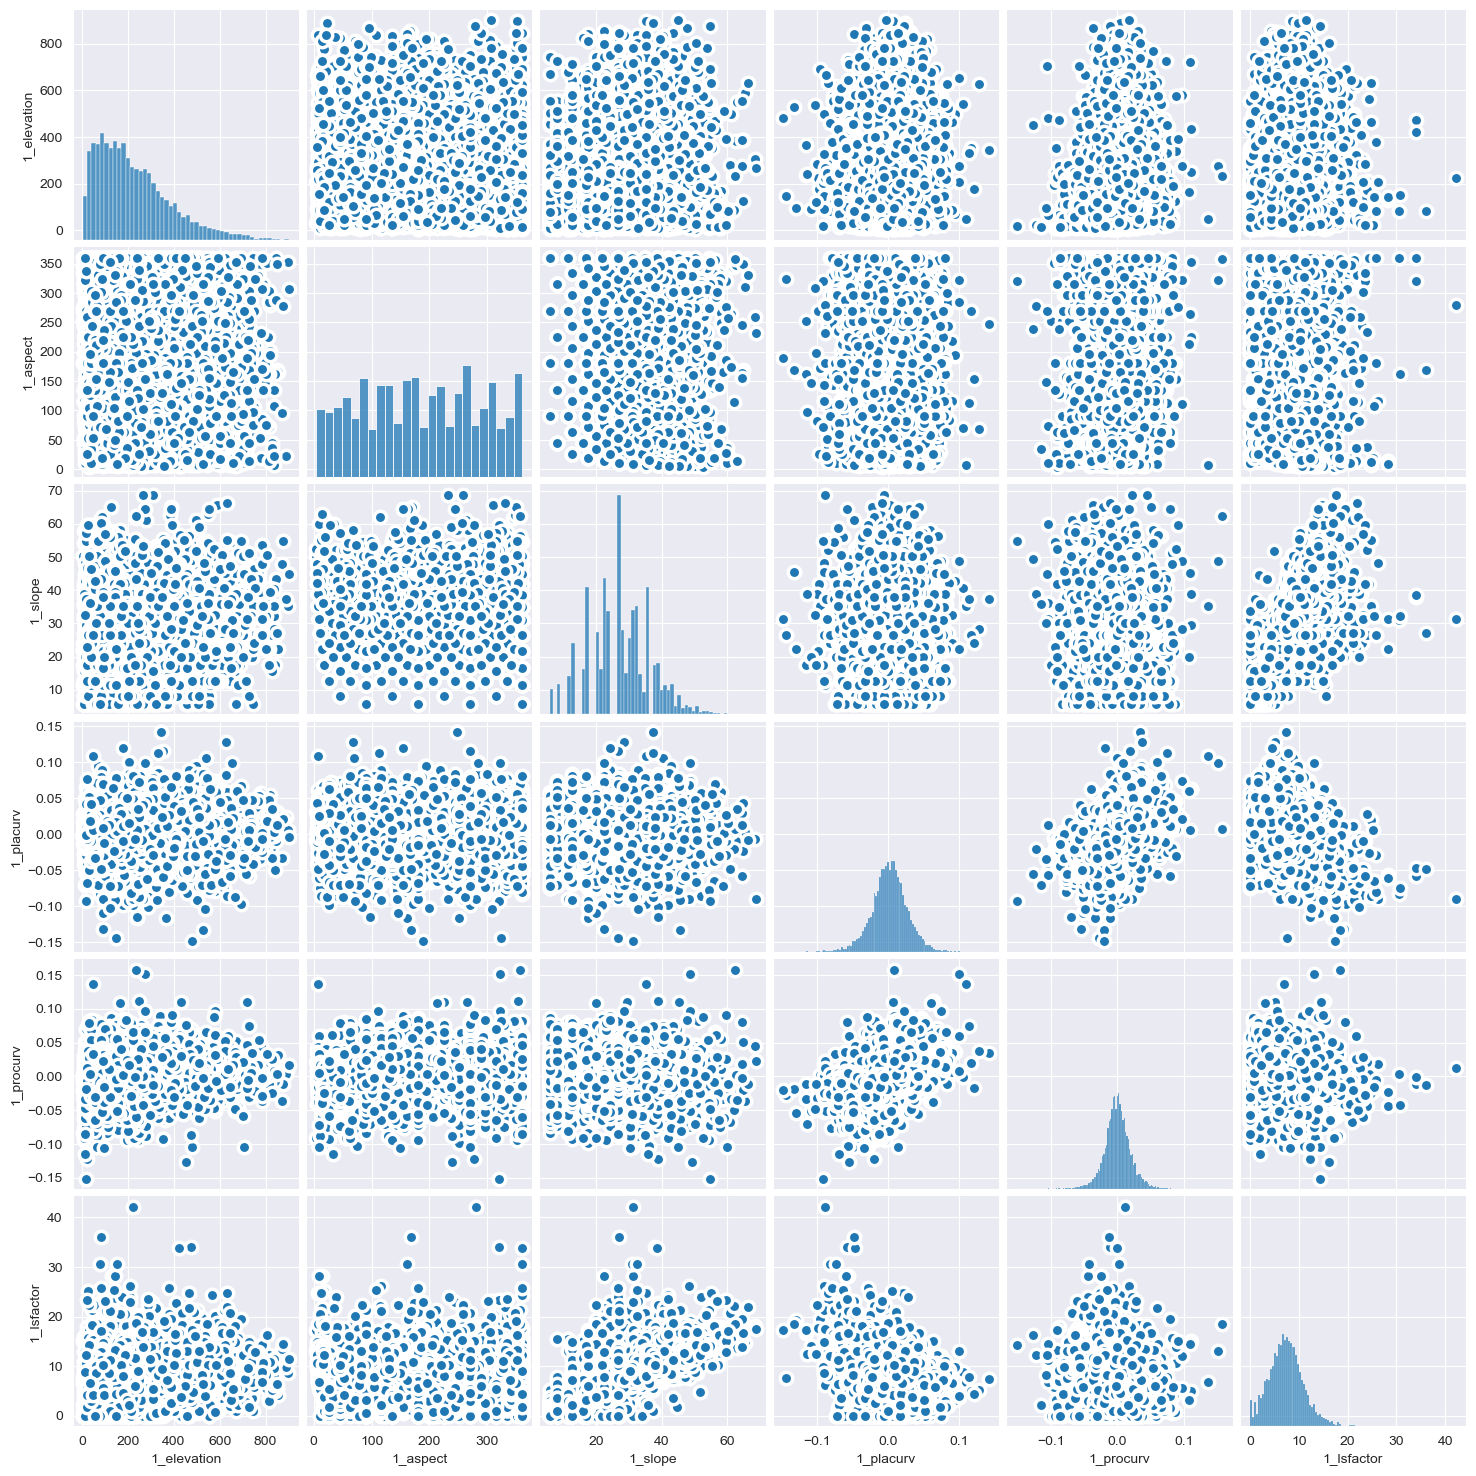

In [38]:
# Type of correlations 
plt.figure(figsize = (20, 12))
sns.pairplot(train[explore_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- There is no correlation for most of the features, how can you capture this information for modelling...
- Which information can you derive from this correlations

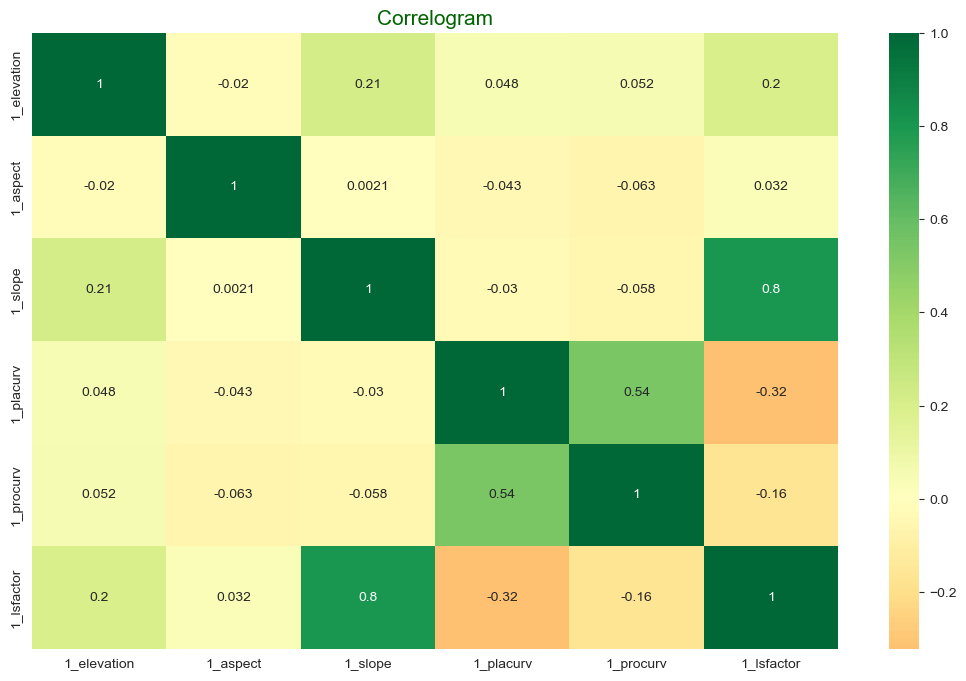

In [39]:
# Quantify correlations
corr = train[explore_cols].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

 - There is a strong positive correlation of approximately 0.8 between slope and IsFactor
 - There is some negative correlation between IsFactor and placurv
 - The IsFactor variable is correlated most of the other features, why is this?

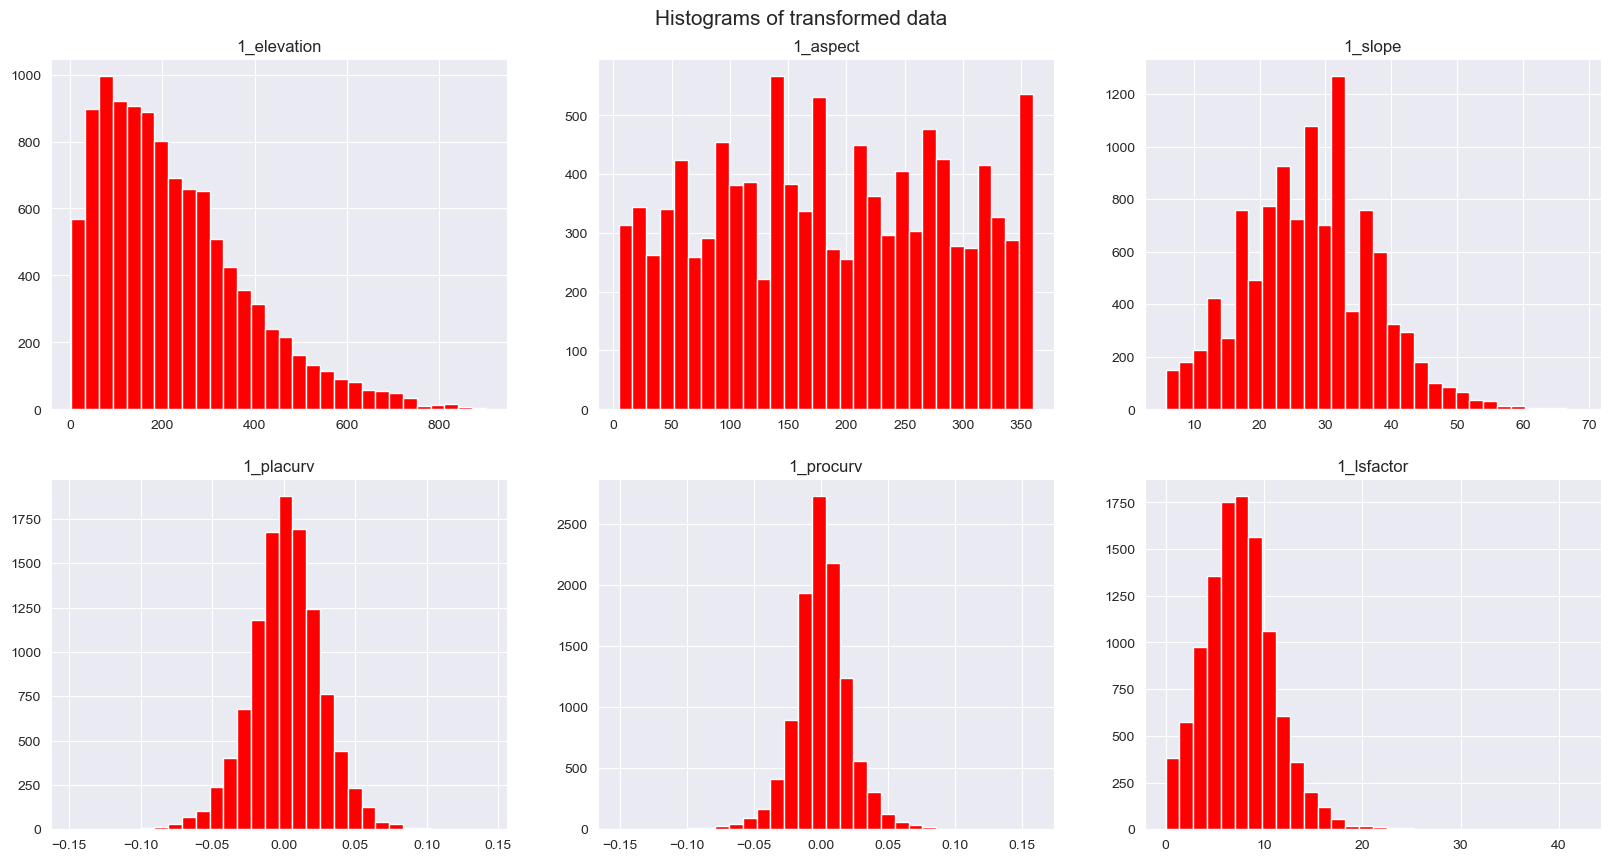

In [40]:
# Plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
fig.suptitle('Histograms of transformed data', y= 0.93, fontsize = 15)

explore_cols =  ['1_elevation', '1_aspect', '1_slope', '1_placurv', '1_procurv', '1_lsfactor']

for ax, col in zip(axes.flatten(), explore_cols):
    ax.hist(train[col], color = 'red', bins=30)
    ax.title.set_text(col)

 - Elevation, slope and lsfactor show a skewed distribution.
 - Aspect showes a highly multimodal distribution.
 - Slope shows a multimodal distribution.
 - A log transform would only benefit elevation in a regression-based algorithm where a normal distribution is assumed. Boosting functions independent of the distributions.

<a name = "Engineering"></a>
## 9. Feature Engineering

Feature engineering consists of: Shuffling the datasets, Min-Max scaling the datasets, One-Hot encoding the datasets, Reshaping the datasets into Psuedo-Images.
##### Shuffling:
Shuffling the training data is performed here since train_test_split is not used to split the data.
##### Min-Max Scaling:
Min-Max scaling is performed by mixing the test data in with the training data which works better in a competition scenario since the test dataset is static, unlike a real-life problem where the test dataset is unseen.<br>
##### One-Hot Encoding:
One-Hot Encoding is performed instead of ordinal encoding since there is no order to the categories.<br>

In [22]:
train_copy = train.copy()
test_copy = test.copy()

# SHUFFLE
train_copy = train_copy.sample(frac=1, random_state=2022).reset_index(drop=True)

def feature_engineering(train_copy, test_copy):
    # MINMAX SCALING
    cols = range(1,26)
    features_orig = ['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'lsfactor', 'sdoif', 'twi',]

    for feature in features_orig:
        dict_strings = [str(x)+'_'+feature for x in cols]
        val_max = np.max([train_copy[dict_strings].values.max(), test_copy[dict_strings].values.max()])
        val_min = np.min([train_copy[dict_strings].values.min(), test_copy[dict_strings].values.min()])

        train_copy[dict_strings] = (train_copy[dict_strings]-val_min)/(val_max-val_min)
        test_copy[dict_strings] = (test_copy[dict_strings]-val_min)/(val_max-val_min)


    # ONE HOT ENCODING
    for col in cols:
        prefix = str(col) + '_geology'
        one_hot = pd.get_dummies(train_copy[prefix], prefix=prefix, drop_first=True)
        train_copy = train_copy.drop(prefix,axis = 1).join(one_hot)
        test_copy = test_copy.drop(prefix,axis = 1).join(one_hot)
        
    return train_copy, test_copy

train_copy, test_copy = feature_engineering(train_copy, test_copy)

# EXPORTING TRANSFORMED DATASETS
train_copy.to_csv('Train_Shuffled.csv', index=None)
test_copy.to_csv('Test_Scaled.csv', index=None)

<a name = "Model"></a>
## 10. Model training

#### Dataset generation
- Separate into train and cross-validation sets without shuffling since the set is already shuffled the same as in the CNN.<br>
- Tomek used to reduce the number of samples in the majority class by removing samples at the decision boundary.
- SMOTE used to generate new minority samples based on the statistical properties of the minority dataset.
- Train:CV split is 80:20 with postive:negative labels resampled to 50:50.
- For the submission the full dataset is used and no cross-validation is performed

In [8]:
# Select main columns to be used in training
train_df = pd.read_csv('Train_Shuffled.csv')
main_cols = train_copy.columns.difference(['Sample_ID', 'Label'])
X = train_df[main_cols]
y = train_df.Label

# Split data into train and test sets
split_ratio=0.8
X_train, X_cv, y_train, y_cv = train_test_split(X,y,train_size=split_ratio, random_state=None, shuffle=False, stratify=None)

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), smote=SMOTE(sampling_strategy='minority'))
X_train, y_train  = resample.fit_resample(X_train, y_train)

#### Models definitions
Categorical Boosting classifier, Extreme Gradient Boosting classifier, Light Gradient Boosting classifier and finally the Stacking classifier which combines the 3 classifiers.

In [9]:
# model = RandomForestClassifier(random_state = 2022)
# model = AdaBoostClassifier()
cat_boost = CatBoostClassifier(verbose = 100, depth = 7)
xgb = XGBClassifier(learning_rate=0.3, max_depth=9, n_estimators=150, reg_lambda=1)
lgbm = LGBMClassifier()

estimators = [('cat', CatBoostClassifier(verbose = 100, depth = 7)),
              ('lgbm', LGBMClassifier()),
              ('xgb', XGBClassifier(learning_rate=0.3, max_depth=9, n_estimators=150)),
             ]

stacking = StackingClassifier(estimators=estimators, cv=5, n_jobs=None)

#### Training the models

In [54]:
cat_boost.fit(X_train, y_train)
pickle.dump(cat_boost, open("CatBoost.p", "wb"))
xgb.fit(X_train, y_train)
pickle.dump(xgb, open("XGB.p", "wb"))
lgbm.fit(X_train, y_train)
pickle.dump(lgbm, open("LGBM.p", "wb"))
stacking.fit(X_train, y_train)
pickle.dump(stacking, open("Stacking.p", "wb"))

Learning rate set to 0.030773
0:	learn: 0.6760850	total: 49.5ms	remaining: 49.4s
100:	learn: 0.3569217	total: 7.93s	remaining: 1m 10s
200:	learn: 0.2989659	total: 16.1s	remaining: 1m 3s
300:	learn: 0.2590598	total: 23.9s	remaining: 55.5s
400:	learn: 0.2185673	total: 31.9s	remaining: 47.6s
500:	learn: 0.1860360	total: 40.1s	remaining: 40s
600:	learn: 0.1609344	total: 50.6s	remaining: 33.6s
700:	learn: 0.1396242	total: 59.2s	remaining: 25.2s
800:	learn: 0.1216702	total: 1m 7s	remaining: 16.8s
900:	learn: 0.1066211	total: 1m 18s	remaining: 8.68s
999:	learn: 0.0936024	total: 1m 27s	remaining: 0us
[23:22:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.030773
0:	learn: 0.6760850	total: 92.8ms	remaining

#### Model evaluation

In [10]:
trained_cat_boost = pickle.load(file=open("CatBoost.p", "rb"))
trained_xgb = pickle.load(file=open("XGB.p", "rb"))
trained_lgbm = pickle.load(file=open("LGBM.p", "rb"))
trained_stacking = pickle.load(file=open("Stacking.p", "rb"))

models = [("CatBoost", trained_cat_boost), ("XGB", trained_xgb), ("LGBM", trained_lgbm), ("Stacking", trained_stacking),]
for name, model in models:
    y_pred = model.predict(X_cv)
    print(name + ' classifier report:')
    print(classification_report(y_cv, y_pred))

CatBoost classifier report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1649
           1       0.71      0.74      0.72       524

    accuracy                           0.86      2173
   macro avg       0.81      0.82      0.82      2173
weighted avg       0.87      0.86      0.87      2173

XGB classifier report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1649
           1       0.70      0.69      0.69       524

    accuracy                           0.85      2173
   macro avg       0.80      0.80      0.80      2173
weighted avg       0.85      0.85      0.85      2173

LGBM classifier report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1649
           1       0.68      0.74      0.71       524

    accuracy                           0.85      2173
   macro avg       0.80      0.81      0.80      2173

<a name = "Conclusion"></a>
## 11. To improve model performance
 - Try different cross-validation and stratification methods.
 - Use a wider array of classifiers with varying strengths and weaknesses in different cases in the StackingClassifier.
 - Feature engineering, trade the Min-Max Scaler for a Robust Scaler to handle the non-normal distributions and outliers.
 - Domain Knowledge, do research on how the provided features affect landslides, soil topology etc. to generate more useful features.
 - Hyperparameter optimization with gridesearchcv for example.

<a name = "Test"></a>
## 12. Export test predictions

In [23]:
test_df = pd.read_csv('Test_Scaled.csv')
test_cols = test_df.columns.difference(['Sample_ID'])
X_test = test_df[test_cols].to_numpy()

y_tests = [(name+"_predictions.csv",model.predict(X_test)) for name, model in models]
for filename, predictions in y_tests:
    pd.DataFrame({'Sample_ID': test_df.Sample_ID, 'Label': predictions}).to_csv(filename, index=None)

In [12]:
foo = pd.read_csv("XGB_predictions.csv")
print(len(foo))
foo.head()

5430


,Sample_ID,Label
0,10865,1
1,10866,0
2,10867,0
3,10868,0
4,10869,1


<a name = "Full"></a>
## 13. Export all predictions

In [13]:
full_df, _ = feature_engineering(train.copy(), test.copy())
X_full = full_df[main_cols].to_numpy()

y_trains = [(name+"_train_predictions.csv",model.predict(X_full)) for name, model in models]
for filename, predictions in y_trains:
    pd.DataFrame({'Sample_ID': full_df.Sample_ID, 'Label': predictions}).to_csv(filename, index=None)

In [18]:
bar = pd.read_csv("LGBM_train_predictions.csv")
print(len(bar))
bar.head()

10864


,Sample_ID,Label
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0
